# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.003
-0.001
-0.002
0.002
0.005
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
-0.002
-0.004
0.0
0.001
-0.002
-0.001
0.0
-0.003
-0.002
0.001
-0.004
-0.004
-0.002
-0.004
0.001
-0.002
-0.003
-0.003
-0.002
-0.002
-0.003
-0.004
-0.004
-0.005
-0.005
-0.001
0.0
0.997
0.999
0.999
0.999
0.999
1.978
1.978
1.982
1.981
1.982
2.967
2.967
2.97
2.97
2.968
3.949
3.948
3.949
3.95
4.931
4.931
4.932
4.933
5.915
5.915
5.915
6.457
6.457
6.458
6.992
6.995
6.998
6.998
6.998
7.982
7.986
7.985
7.986
8.972
8.972
8.971
8.972
9.942
9.945
9.945
9.945
10.933
10.935
11.941
11.938
11.936
11.941
12.919
12.92
12.922
12.923
12.923
13.63
13.63
13.632
13.631
14.355
14.355
14.355
15.347
15.345
15.346
15.346
16.334
17.309
17.316
17.313
17.314
17.313
18.298
18.298
18.298
19.278
19.281
19.281
19.281
20.262
20.261
20.261
20.262
20.978
20.987
20.985
20.987
21.706
21.707
21.705
22.686
22.691
22.693
22.691
23.668
23.671
23.672
24.673
24.675
24.674
24.676
25.679
25.679
25.674
25.676
26.655
26.653
27.63
27.631
28.18
28.178
28.177
28.725
28.727
2

56.647
56.645
56.645
56.647
56.647
56.638
56.648
56.645
56.646
56.641
56.644
56.645
57.125
57.126
57.123
57.123
57.124
57.124
57.127
57.126
57.125
57.541
57.543
57.545
57.545
57.545
57.547
57.546
57.542
58.015
58.024
58.023
58.022
58.026
58.022
58.022
58.024
58.024
58.525
58.542
58.542
58.541
58.539
58.544
58.544
58.537
58.546
58.966
58.977
58.978
58.974
58.973
58.977
58.973
58.973
59.322
59.322
59.328
59.33
59.323
59.326
59.326
59.327
59.326
59.327
59.329
59.328


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.003
1,2,-0.001
2,4,-0.002
3,6,0.002
4,8,0.005
...,...,...
1260,2520,59.327
1261,2522,59.326
1262,2524,59.327
1263,2526,59.329


<IPython.core.display.Javascript object>


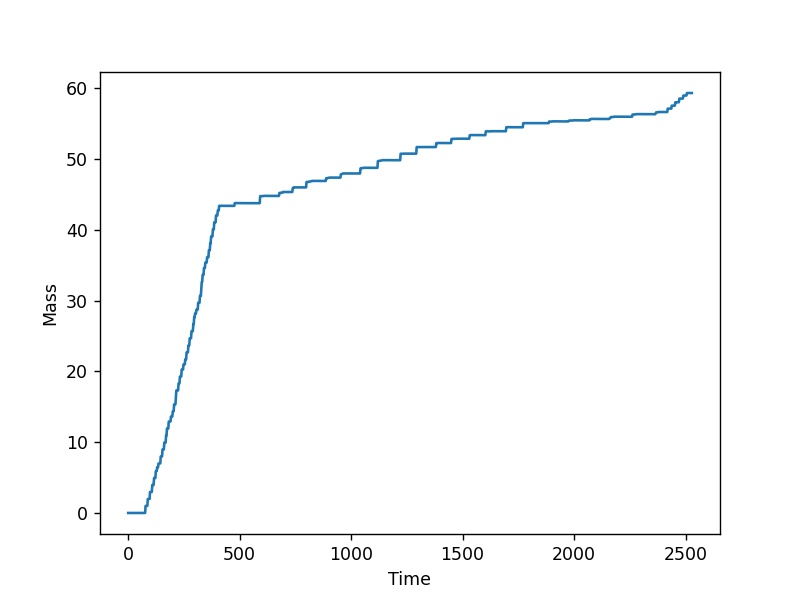

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_240423_S343-348.csv')